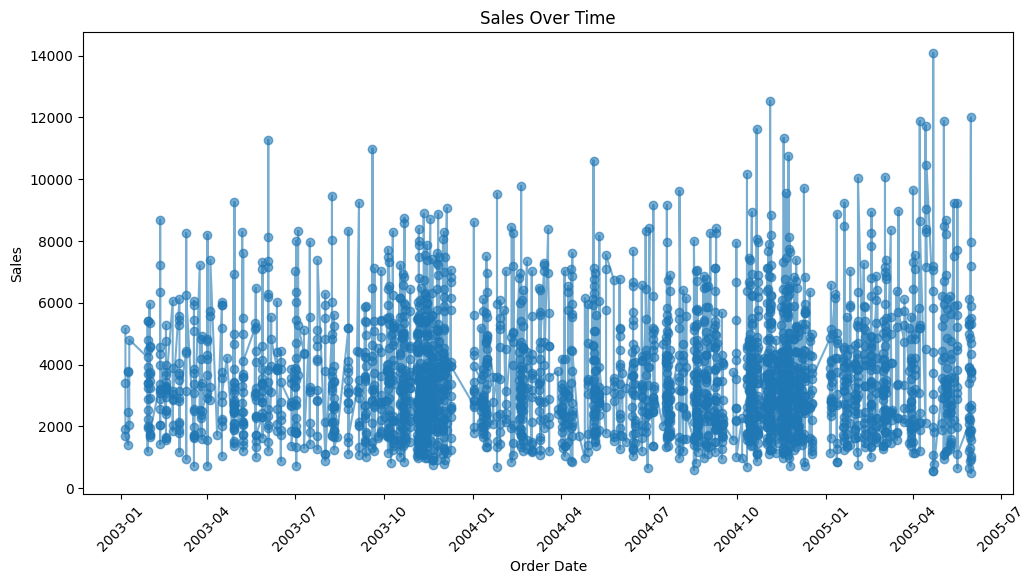

Mean Absolute Error: 1490.0487810266382
Mean Squared Error: 3870879.6724429196
Root Mean Squared Error: 1967.4551259032364
R2 Score: 0.0028458403002645793
    ORDERDATE  Predicted_Sales
0  2005-06-01      3671.209308
1  2005-06-02      3668.664467
2  2005-06-03      3666.119625
3  2005-06-04      3663.574784
4  2005-06-05      3661.029942
5  2005-06-06      3658.485100
6  2005-06-07      3655.940259
7  2005-06-08      3653.395417
8  2005-06-09      3650.850576
9  2005-06-10      3648.305734
10 2005-06-11      3645.760893
11 2005-06-12      3643.216051
12 2005-06-13      3640.671210
13 2005-06-14      3638.126368
14 2005-06-15      3635.581526
15 2005-06-16      3633.036685
16 2005-06-17      3630.491843
17 2005-06-18      3627.947002
18 2005-06-19      3625.402160
19 2005-06-20      3622.857319
20 2005-06-21      3620.312477
21 2005-06-22      3617.767636
22 2005-06-23      3615.222794
23 2005-06-24      3612.677952
24 2005-06-25      3610.133111
25 2005-06-26      3607.588269
26 2005-

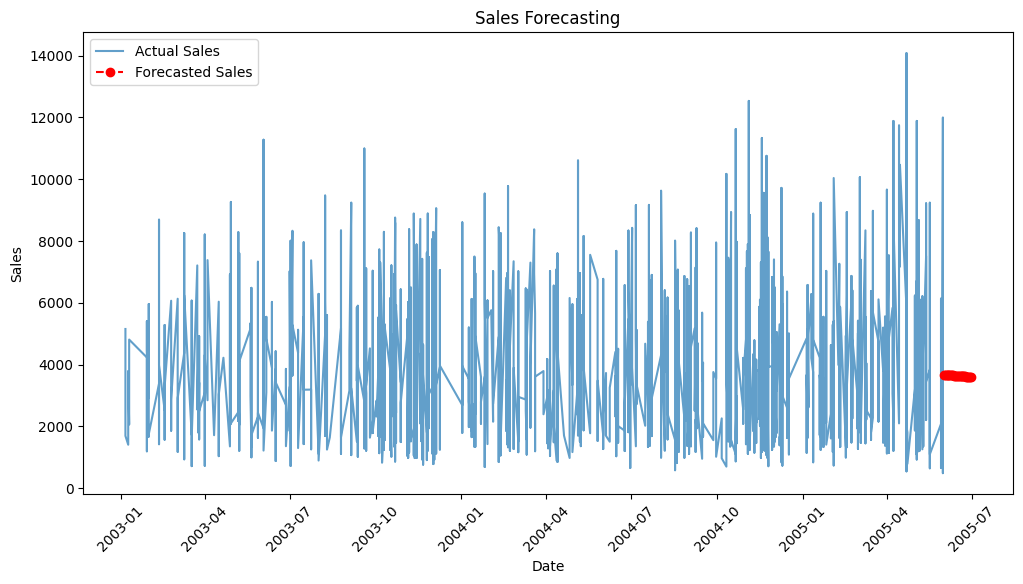

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('/content/sales_data_sample.csv',encoding='latin1')

df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df = df.sort_values('ORDERDATE')

df['Year'] = df['ORDERDATE'].dt.year
df['Month'] = df['ORDERDATE'].dt.month
df['Day'] = df['ORDERDATE'].dt.day

plt.figure(figsize=(12,6))
plt.plot(df['ORDERDATE'], df['SALES'], marker='o', linestyle='-', alpha=0.6)
plt.title('Sales Over Time')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

X = df[['Year', 'Month', 'Day']]
y = df['SALES']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))

future_dates = pd.date_range(start=df['ORDERDATE'].max() + pd.Timedelta(days=1), periods=30, freq='D')
future_df = pd.DataFrame({
    'ORDERDATE': future_dates,
    'Year': future_dates.year,
    'Month': future_dates.month,
    'Day': future_dates.day
})

future_sales_pred = model.predict(future_df[['Year', 'Month', 'Day']])
future_df['Predicted_Sales'] = future_sales_pred

print(future_df[['ORDERDATE', 'Predicted_Sales']])

plt.figure(figsize=(12,6))
plt.plot(df['ORDERDATE'], df['SALES'], label='Actual Sales', alpha=0.7)
plt.plot(future_df['ORDERDATE'], future_df['Predicted_Sales'], color='red', linestyle='--', marker='o', label='Forecasted Sales')
plt.title("Sales Forecasting")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.xticks(rotation=45)
plt.show()